In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
import math
import pickle
import pycatch22

In [427]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression


## 10 minute prediction

In [341]:
with open('./data/features_60_10_10.pickle', 'rb') as f:
    data,data_new=pickle.load(f)

In [423]:
data_new=data_new.ffill()

In [342]:
data.loc[:,'same_day']=data.same_day.fillna(False)

<AxesSubplot:>

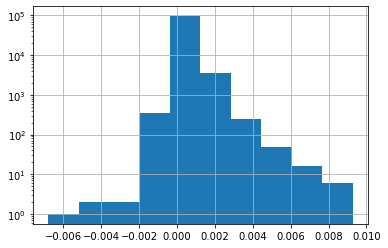

In [398]:
(data.pred_max-data.pred_open).hist(log=True)

In [522]:
data.loc[:,'target_notloss']=0
data.loc[:,'target_profit']=0
data.loc[(data.pred_min-data.pred_open)>(-0.001),'target_notloss']=1
data.loc[(data.pred_max-data.pred_open)>(0.003),'target_profit']=1

In [523]:
data.loc[:,'target']=(data.target_notloss & data.target_profit)

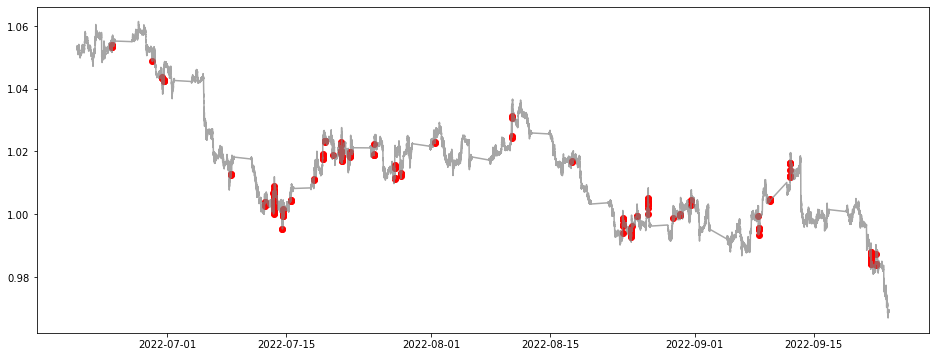

In [526]:
plt.figure(figsize=(16,6))
plt.plot(data.Time,data.Close_EURUSD,color='grey',alpha=0.7)
plt.scatter(data.Time[data.target==1],data.Open_EURUSD[data.target==1],color='red')


### CLASSIFICATION MODEL
Resposne variable - stoploss<10pip, takeprofit>10pip

In [530]:
y_train.sum()

190

In [527]:
y=data.loc[data.same_day,'target']
x=data_new.loc[y.index,:]

X_train=x.iloc[:-20000] 
X_test=x.iloc[-20000:]
y_train=y.iloc[:-20000] 
y_test=y.iloc[-20000:]

In [531]:
for alpha in [0.0002,0.0003,0.0005,0.0008,0.001,0.002,0.003,0.004]:
    model = LogisticRegression(penalty = 'elasticnet', solver = 'saga', l1_ratio = 0.5,C=alpha,max_iter=1000,class_weight='balanced')
    model.fit(scaler.transform(X_train), y_train)
    y_pred=model.predict_proba(scaler.transform(X_test))[:, 1]
    print("Alpha: {}  || ROC-AUC: {}".format(alpha,roc_auc_score(y_test, y_pred)))

Alpha: 0.0002  || ROC-AUC: 0.9634861006761833


/Users/imro/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Alpha: 0.0003  || ROC-AUC: 0.9618303459625773


KeyboardInterrupt: 

In [532]:
model = LogisticRegression(penalty = 'elasticnet', solver = 'saga', l1_ratio = 0.5,C=0.0002,max_iter=1000,class_weight='balanced')
model.fit(scaler.transform(X_train), y_train)

LogisticRegression(C=0.0002, class_weight='balanced', l1_ratio=0.5,
                   max_iter=1000, penalty='elasticnet', solver='saga')

In [534]:
y_pred=model.predict_proba(scaler.transform(X_test))[:, 1]
print("Alpha: {}  || ROC-AUC: {}".format(alpha,roc_auc_score(y_test, y_pred)))

Alpha: 0.0005  || ROC-AUC: 0.9634903939036171


In [585]:
data.loc[y_test.index,'prediction']=y_pred>0.92

(0.98, 1.02)

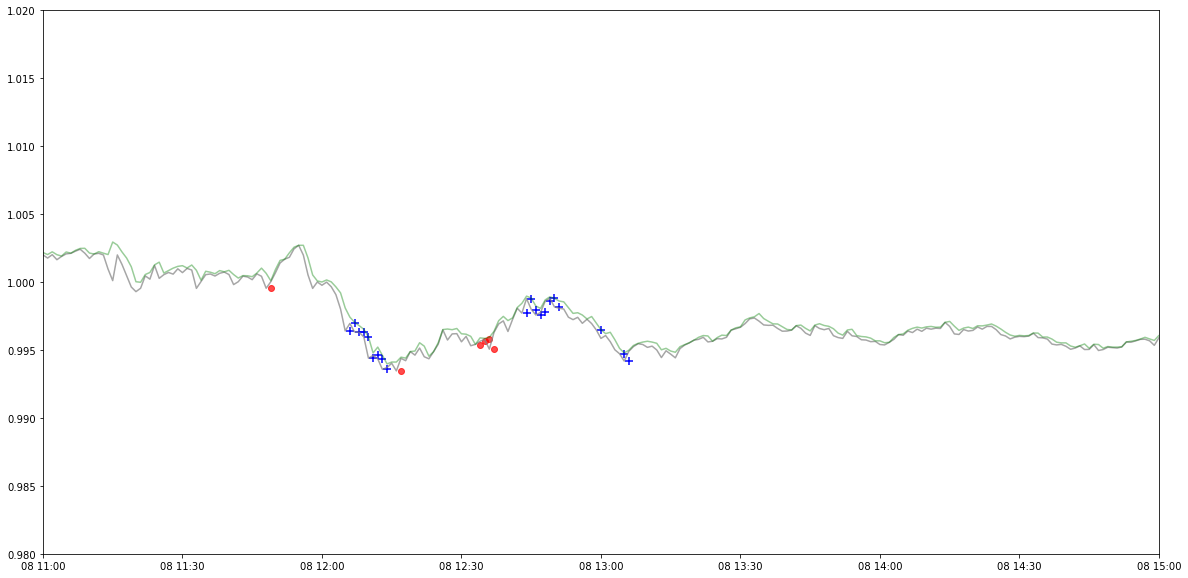

In [594]:
plt.figure(figsize=(20,10))
plt.plot(data.Time,data.Close_EURUSD,color='grey',alpha=0.7)
plt.plot(data.Time,data.High_EURUSD,color='green',alpha=0.4)

plt.scatter(data.Time[data.target==1],data.Open_EURUSD[data.target==1],color='red',alpha=0.7)
plt.scatter(data.Time[data.prediction==1],data.Open_EURUSD[data.prediction==1],color='blue',marker='+',s=50)

plt.xlim(pd.to_datetime('2022-09-08 11'),pd.to_datetime('2022-09-08 15'))
plt.ylim(0.98,1.02)

In [579]:
data.loc[y_test.index,'y_test']=y_test
data.loc[y_test.index,'prediction']=y_pred>0.4

(array([15288.,  2742.,  1010.,   423.,   210.,   103.,    87.,    56.,
           41.,    40.]),
 array([0.00281452, 0.09987203, 0.19692955, 0.29398706, 0.39104457,
        0.48810209, 0.5851596 , 0.68221711, 0.77927463, 0.87633214,
        0.97338965]),
 <BarContainer object of 10 artists>)

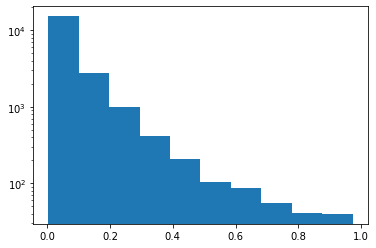

In [521]:
plt.hist(y_pred,log=True)

In [642]:
res=pd.DataFrame()
for i in range(0,100):
    data.loc[y_test.index,'prediction']=y_pred>(i/100)
    
    res.loc[i,'winrate']=data.loc[data.prediction==1,'target'].mean()

<AxesSubplot:>

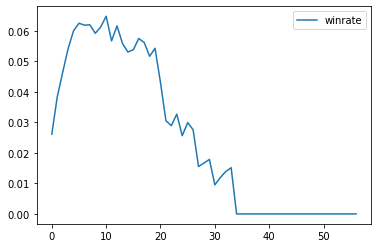

In [643]:
res.plot()

(0.98, 1.01)

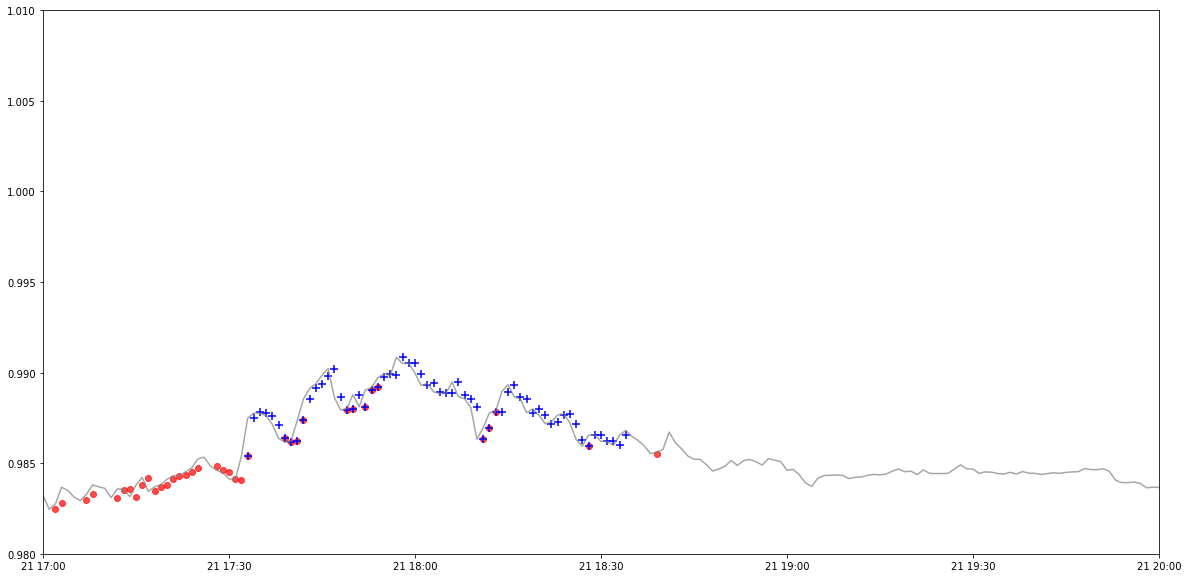

In [495]:
plt.figure(figsize=(20,10))
plt.plot(data.Time,data.Close_EURUSD,color='grey',alpha=0.7)
plt.scatter(data.Time[data.target==1],data.Open_EURUSD[data.target==1],color='red',alpha=0.7)
plt.scatter(data.Time[data.prediction==1],data.Open_EURUSD[data.prediction==1],color='blue',marker='+',s=50)

plt.xlim(pd.to_datetime('2022-09-21 17'),pd.to_datetime('2022-09-21 20'))
plt.ylim(0.98,1.01)

## 30 minute prediction

In [597]:
with open('./data/features_90_10_30.pickle', 'rb') as f:
    data,data_new=pickle.load(f)

In [598]:
data_new=data_new.ffill()

In [599]:
data.loc[:,'same_day']=data.same_day.fillna(False)

<AxesSubplot:>

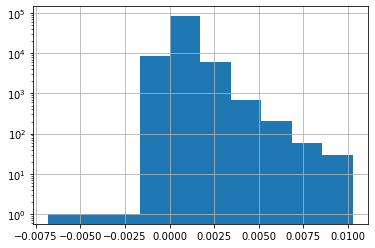

In [600]:
(data.pred_max-data.pred_open).hist(log=True)

In [601]:
data.loc[:,'target_notloss']=0
data.loc[:,'target_profit']=0
data.loc[(data.pred_min-data.pred_open)>(-0.001),'target_notloss']=1
data.loc[(data.pred_max-data.pred_open)>(0.003),'target_profit']=1

In [602]:
data.loc[:,'target']=(data.target_notloss & data.target_profit)

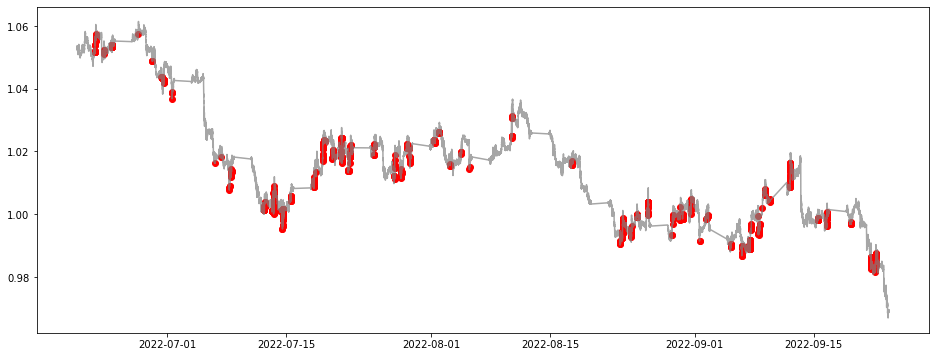

In [644]:
plt.figure(figsize=(16,6))
plt.plot(data.Time,data.Close_EURUSD,color='grey',alpha=0.7)
plt.scatter(data.Time[data.target==1],data.Open_EURUSD[data.target==1],color='red')


In [606]:
y_train.sum()

967

In [605]:
y=data.loc[data.same_day,'target']
x=data_new.loc[y.index,:]

X_train=x.iloc[:-20000] 
X_test=x.iloc[-20000:]
y_train=y.iloc[:-20000] 
y_test=y.iloc[-20000:]

In [ ]:
for alpha in [0.0002,0.0003,0.0005,0.0008,0.001,0.002,0.003,0.004]:
    model = LogisticRegression(penalty = 'elasticnet', solver = 'saga', l1_ratio = 0.5,C=alpha,max_iter=1000,class_weight='balanced')
    model.fit(scaler.transform(X_train), y_train)
    y_pred=model.predict_proba(scaler.transform(X_test))[:, 1]
    print("Alpha: {}  || ROC-AUC: {}".format(alpha,roc_auc_score(y_test, y_pred)))


In [611]:
alpha=0.0002
model = LogisticRegression(penalty = 'elasticnet', solver = 'saga', l1_ratio = 0.5,C=alpha,max_iter=1000,class_weight='balanced')
model.fit(scaler.transform(X_train), y_train)



Alpha: 0.0002  || ROC-AUC: 0.8310082266058749


In [645]:
y_pred=model.predict_proba(scaler.transform(X_test))[:, 1]
print("Alpha: {}  || ROC-AUC: {}".format(alpha,roc_auc_score(y_test, y_pred)))

Alpha: 0.0002  || ROC-AUC: 0.8310082266058749


In [659]:
data.loc[y_test.index,'prediction']=y_pred>0.92

(0.98, 0.995)

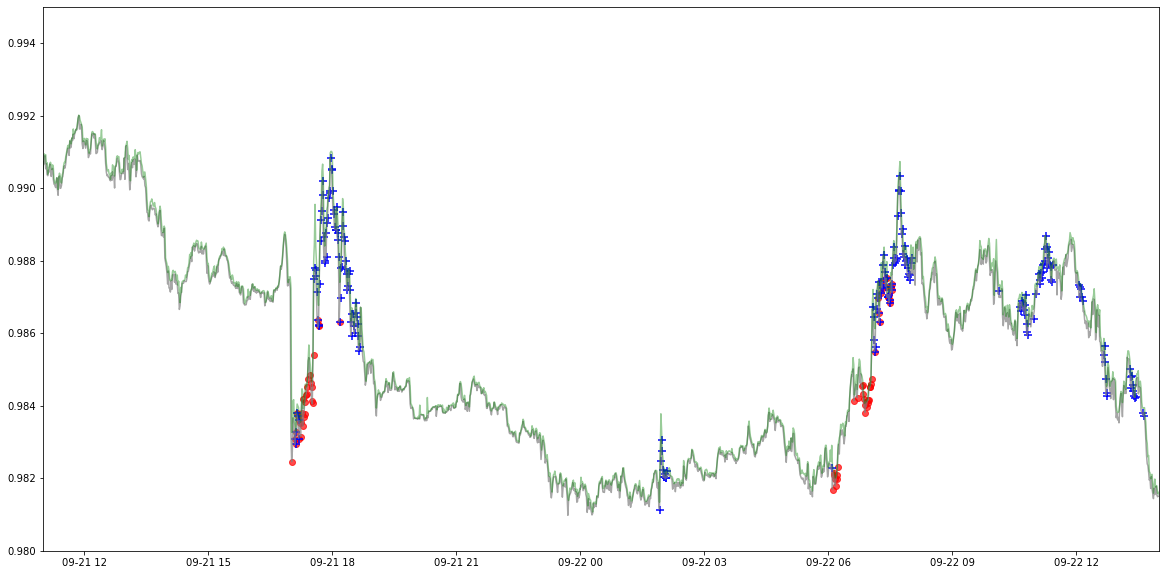

In [660]:
plt.figure(figsize=(20,10))
plt.plot(data.Time,data.Close_EURUSD,color='grey',alpha=0.7)
plt.plot(data.Time,data.High_EURUSD,color='green',alpha=0.4)

plt.scatter(data.Time[data.target==1],data.Open_EURUSD[data.target==1],color='red',alpha=0.7)
plt.scatter(data.Time[data.prediction==1],data.Open_EURUSD[data.prediction==1],color='blue',marker='+',s=50)

plt.xlim(pd.to_datetime('2022-09-21 11'),pd.to_datetime('2022-09-22 14'))
plt.ylim(0.98,0.995)

In [622]:
clf=RandomForestClassifier(n_estimators=500,max_depth=30,class_weight='balanced')
clf.fit(X_train.loc[:,model.coef_[0]>0],y_train)
y_pred=clf.predict_proba(X_test.loc[:,model.coef_[0]>0])[:, 1]
roc_auc_score(y_test, y_pred)

0.7616146228848111

In [625]:
clf=RandomForestClassifier(n_estimators=500,max_depth=50,class_weight='balanced',criterion='entropy',max_features=0.9)
clf.fit(X_train.loc[:,model.coef_[0]>0],y_train)
y_pred=clf.predict_proba(X_test.loc[:,model.coef_[0]>0])[:, 1]
roc_auc_score(y_test, y_pred)

0.7740429849139309

In [626]:
clf=RandomForestClassifier(n_estimators=500,max_depth=50,class_weight='balanced',criterion='entropy',max_features=0.9,
                          min_samples_leaf=3,min_samples_split=5)
clf.fit(X_train.loc[:,model.coef_[0]>0],y_train)
y_pred=clf.predict_proba(X_test.loc[:,model.coef_[0]>0])[:, 1]
roc_auc_score(y_test, y_pred)

0.7880065659385997

In [639]:
y_pred=clf.predict_proba(X_test.loc[:,model.coef_[0]>0])[:, 1]
roc_auc_score(y_test, y_pred)

0.7880065659385997

### REGRESSION MODEL
Rescaling resposne to achieve higher focus on outlying observations

<AxesSubplot:>

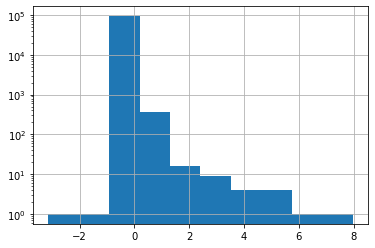

In [344]:
y=(data.loc[data.same_day,'gain']**(3)*1e7)
y.hist(log=True)

In [371]:
x=data_new.loc[y.index,:]

In [372]:
X_train=x.iloc[:-20000] 
X_test=x.iloc[-20000:]
y_train=y.iloc[:-20000] 
y_test=y.iloc[-20000:]

In [373]:
#from sklearn import preprocessing


In [374]:
scaler = preprocessing.StandardScaler().fit(X_train)


In [385]:

model=ElasticNet(alpha=0.003, l1_ratio=0.5)
model.fit(scaler.transform(X_train),y_train)

y_pred=model.predict(scaler.transform(X_test))

In [386]:
X_test.columns[model.coef_>0]

Index(['FC_LocalSimple_mean3_stderr_n2_High_EURUSD',
       'DN_Spread_Std_n2_Low_EURUSD', 'DN_Spread_Std_n2_Close_EURUSD',
       'SB_BinaryStats_mean_longstretch1_n1_High_AUDUSD',
       'DN_Spread_Std_n2_Low_AUDUSD', 'DN_Spread_Std_n2_Volume_AUDUSD',
       'IN_AutoMutualInfoStats_40_gaussian_fmmi_n1_Volume_EURJPY',
       'DN_Spread_Std_n2_High_USDCAD', 'DN_Spread_Std_n1_Low_USDCAD',
       'SB_BinaryStats_mean_longstretch1_n1_Volume_USDCAD',
       'DN_Spread_Std_n2_Volume_USDCAD'],
      dtype='object')

In [389]:
r2_score(y_true=y_test,y_pred=y_pred)

0.015243801251227374

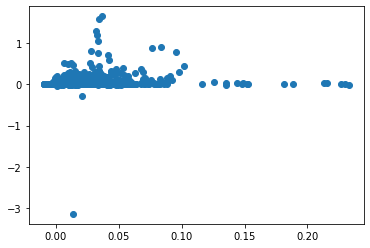

In [390]:
plt.scatter(x=y_pred,y=y_test)

In [327]:
data.loc[y_test[y_pred>0.02].index,'signal']=1
data.loc[y_test[y_pred<=0.02].index,'signal']=0

<AxesSubplot:>

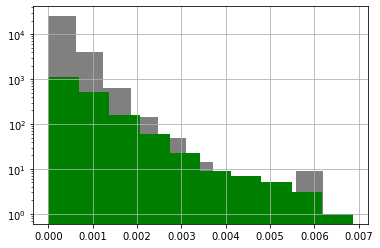

In [328]:
data.loc[data.signal==0,'gain'].hist(color='grey',log=True)
data.loc[data.signal==1,'gain'].hist(color='green',log=True)

In [329]:
data.Time.shift(-60)

0       2022-06-20 10:22:00
1       2022-06-20 10:23:00
2       2022-06-20 10:24:00
3       2022-06-20 10:25:00
4       2022-06-20 10:26:00
                ...        
99995                   NaT
99996                   NaT
99997                   NaT
99998                   NaT
99999                   NaT
Name: Time, Length: 100000, dtype: datetime64[ns]

In [330]:
data.loc[:,'signal']=data.signal.shift(60)

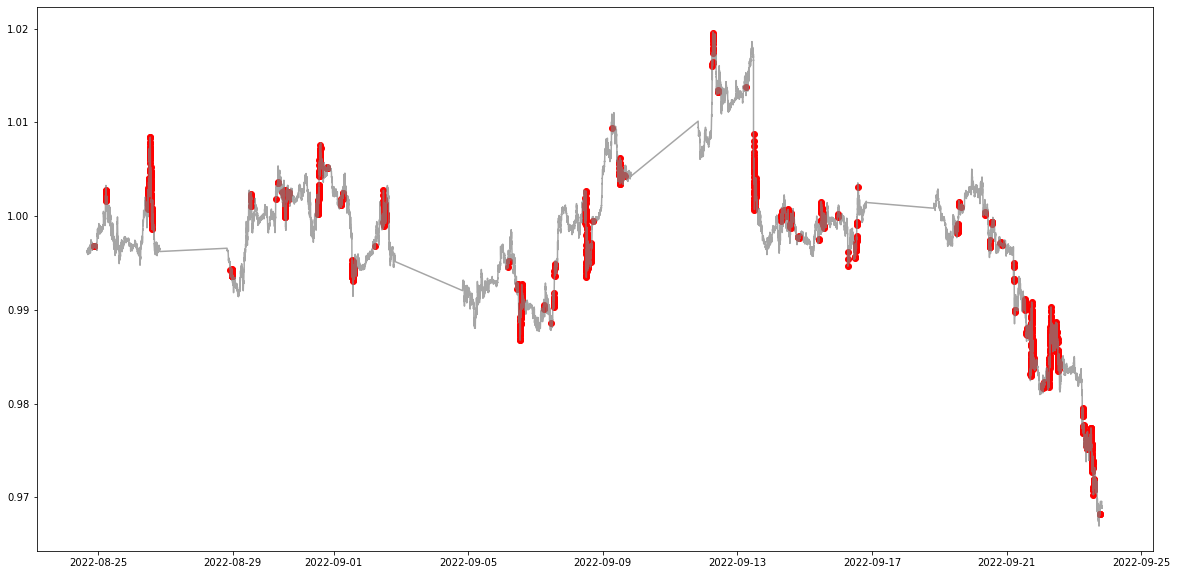

In [331]:
plt.figure(figsize=(20,10))
plt.plot(data.Time[data.signal.notna()],data.Close_EURUSD[data.signal.notna()],color='grey',alpha=0.7)
plt.scatter(data.Time[data.signal==1],data.Close_EURUSD[data.signal==1],color='red')
#plt.scatter(data.Time[data.signal==1],data.pred_min[data.signal==1],color='blue',alpha=0.4)


In [304]:
data.loc[:,'signal']=data.signal.shift(60)

(19256.0, 19258.0)

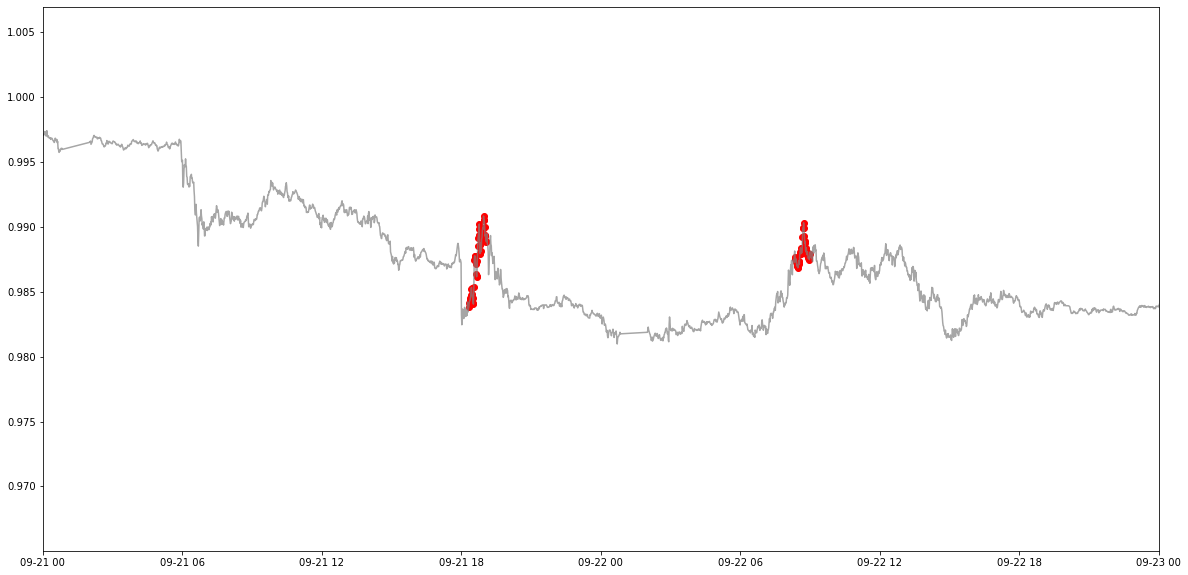

In [305]:
plt.figure(figsize=(20,10))
plt.plot(data.Time_pred[data.signal.notna()],data.Close_EURUSD[data.signal.notna()],color='grey',alpha=0.7)
plt.scatter(data.Time_pred[data.signal==1],data.Close_EURUSD[data.signal==1],color='red')
#plt.scatter(data.Time[data.signal==1],data.pred_min[data.signal==1],color='blue',alpha=0.4)
plt.xlim(pd.to_datetime('2022-09-21'),pd.to_datetime('2022-09-23'))

In [224]:
data.head()

,Time,Open_EURUSD,High_EURUSD,Low_EURUSD,Close_EURUSD,Volume_EURUSD,Open_AUDUSD,High_AUDUSD,Low_AUDUSD,Close_AUDUSD,Volume_AUDUSD,Open_EURJPY,High_EURJPY,Low_EURJPY,Close_EURJPY,Volume_EURJPY,Open_GBPAUD,High_GBPAUD,Low_GBPAUD,Close_GBPAUD,Volume_GBPAUD,Open_USDCAD,High_USDCAD,Low_USDCAD,Close_USDCAD,Volume_USDCAD,date_day,ID,ID_day,pred_open,pred_max,pred_min,same_day,gain,signal
0,2022-06-20 09:22:00,1.05252,1.05261,1.05242,1.05261,134,0.69901,0.69912,0.69899,0.69907,48.0,141.891,141.904,141.886,141.900,235.0,1.74989,1.75011,1.74973,1.75009,193.0,1.29937,1.29937,1.29927,1.29927,62.0,2022-06-20,0,0.0,1.05246,1.05285,1.05225,True,0.00039,NaN
1,2022-06-20 09:23:00,1.05262,1.05275,1.05253,1.05271,180,0.69906,0.69914,0.69901,0.69913,55.0,141.901,141.933,141.895,141.925,260.0,1.75012,1.75042,1.75010,1.75013,202.0,1.29928,1.29931,1.29923,1.29924,111.0,2022-06-20,1,1.0,1.05256,1.05300,1.05225,True,0.00044,NaN
2,2022-06-20 09:24:00,1.05269,1.05277,1.05259,1.05273,173,0.69913,0.69915,0.69910,0.69913,42.0,141.926,141.949,141.914,141.948,237.0,1.75021,1.75106,1.74999,1.75098,254.0,1.29927,1.29930,1.29924,1.29927,69.0,2022-06-20,2,2.0,1.05251,1.05300,1.05225,True,0.00049,NaN
3,2022-06-20 09:25:00,1.05274,1.05295,1.05262,1.05295,189,0.69915,0.69931,0.69913,0.69930,52.0,141.950,141.950,141.931,141.948,239.0,1.75097,1.75098,1.75036,1.75042,183.0,1.29926,1.29931,1.29919,1.29920,61.0,2022-06-20,3,3.0,1.05244,1.05312,1.05225,True,0.00068,NaN
4,2022-06-20 09:26:00,1.05297,1.05297,1.05291,1.05296,77,0.69931,0.69936,0.69923,0.69935,89.0,141.948,141.964,141.946,141.958,190.0,1.75042,1.75068,1.75036,1.75038,149.0,1.29919,1.29919,1.29905,1.29907,81.0,2022-06-20,4,4.0,1.05241,1.05337,1.05225,True,0.00096,NaN


In [79]:
clf=RandomForestClassifier(n_estimators=500,max_depth=30)
clf.fit(X_train,y_train)
y_pred=clf.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, y_pred)

0.7237126989151391

In [62]:
clf=RandomForestClassifier(n_estimators=100,max_depth=30)
clf.fit(X_train,y_train)
y_pred=clf.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, y_pred)

0.6749092598332327

In [109]:
clf = AdaBoostClassifier(n_estimators=300, random_state=0)
clf.fit(X_train, y_train)
y_pred=clf.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, y_pred)

0.7297879837190937

In [110]:
clf = AdaBoostClassifier(n_estimators=300, random_state=0)
clf.fit(scaler.transform(X_train), y_train)
y_pred=clf.predict_proba(scaler.transform(X_test))[:, 1]
roc_auc_score(y_test, y_pred)

0.7414132287160402

In [107]:
from sklearn.linear_model import LogisticRegression
for alpha in [0.0002,0.0003,0.0005,0.0008,0.001,0.002,0.003,0.004]:
    model = LogisticRegression(penalty = 'elasticnet', solver = 'saga', l1_ratio = 0.5,C=alpha,max_iter=1000)
    model.fit(scaler.transform(X_train), y_train)
    y_pred=model.predict_proba(scaler.transform(X_test))[:, 1]
    print("Alpha: {}  || ROC-AUC: {}".format(alpha,roc_auc_score(y_test, y_pred)))


Alpha: 0.0002  || ROC-AUC: 0.7643733353796374
Alpha: 0.0003  || ROC-AUC: 0.76953040520017
Alpha: 0.0005  || ROC-AUC: 0.7712669499518798
Alpha: 0.0008  || ROC-AUC: 0.7759804833753785
Alpha: 0.001  || ROC-AUC: 0.7771830706710279
Alpha: 0.002  || ROC-AUC: 0.7739858485287395
Alpha: 0.003  || ROC-AUC: 0.7720373834166243
Alpha: 0.004  || ROC-AUC: 0.7699440144008646


In [108]:
from sklearn.linear_model import LogisticRegression
for alpha in [0.0002,0.0003,0.0005,0.0008,0.001,0.002,0.003,0.004]:
    model = LogisticRegression(penalty = 'elasticnet', solver = 'saga', l1_ratio = 0.5,C=alpha,max_iter=1000)
    model.fit(X_train, y_train)
    y_pred=model.predict_proba(X_test)[:, 1]
    print("Alpha: {}  || ROC-AUC: {}".format(alpha,roc_auc_score(y_test, y_pred)))


/Users/imro/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Alpha: 0.0002  || ROC-AUC: 0.7299349339267616


KeyboardInterrupt: 

In [103]:

print("Alpha: {}  || ROC-AUC: {}".format(alpha,roc_auc_score(y_test, y_pred)))

Alpha: 0.1  || ROC-AUC: 0.7557999609923295


0.7540551031305254

In [ ]:
print("Elasticnet: {}".format(elastic_net_classifier.score(X_test, y_test)))


In [46]:
y_test[y_pred>0.4].mean()

0.4672131147540984

In [50]:
df_fi=pd.DataFrame()
df_fi.index=x.columns
df_fi.loc[:,'importance']=clf.feature_importances_

In [52]:
df_fi.sort_values('importance')

,importance
open_SP_Summaries_welch_rect_centroid,0.001178
low_SP_Summaries_welch_rect_centroid,0.001215
high_SP_Summaries_welch_rect_centroid,0.001234
close_SP_Summaries_welch_rect_centroid,0.001243
close_SC_FluctAnal_2_rsrangefit_50_1_logi_prop_r1,0.002548
...,...
low_DN_Spread_Std,0.022889
open_DN_Spread_Std,0.025367
high_DN_Spread_Std,0.025892
close_DN_Spread_Std,0.026281
